In [17]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [31]:
df_main = pd.read_csv('dfimputed.csv')

In [32]:
df_main = df_main.drop(['SCOPE_1_log', 'SCOPE_2_log'], axis=1)

In [33]:
df_main.describe()

,Year,NUMBER_OF_EMPLOYEES,SCOPE_1,SCOPE_2,SCOPE 1+2,SCOPE 3,ENERGY_CONSUMPTION_TOTAL,TOTAL_WASTE_GENERATED,Income,Market Cap,Revenue,Total Assets,TTM Gross Profit,Gross Margin,Waste GHG,GHG per Capita,Country GHG_y,Energy GHG,Year_new
count,310.000000,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,310.000000,3.100000e+02,3.100000e+02,310.000000,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,310.000000,310.000000,310.000000,3.100000e+02,3.100000e+02,310.000000
mean,2018.538710,2.300918e+05,1.221669e+07,4.392012e+06,1.884180e+07,0.232258,4.418396e+10,4.034711e+08,47824.870968,2.474898e+11,1.280543e+11,5.302836e+11,4.945419e+10,0.486843,106479.904830,15.122762,4.092980e+06,3.370523e+06,3.538710
std,1.743258,3.381187e+05,2.763853e+07,7.770702e+06,4.566998e+07,0.422955,2.027857e+11,1.429190e+09,18171.189738,3.403735e+11,9.584349e+10,7.544288e+11,2.975024e+10,0.196916,69978.807728,5.137126,2.552995e+06,2.103496e+06,1.743258
min,2015.000000,1.345000e+03,1.530000e+03,0.000000e+00,3.800000e+04,0.000000,8.330000e+02,8.030000e+02,1680.000000,3.250000e+09,3.740000e+09,2.310000e+09,1.000000e+07,0.112125,1142.127000,2.144000,4.378974e+04,3.265955e+04,0.000000
25%,2017.000000,7.124250e+04,7.002500e+04,5.395160e+05,7.307412e+05,0.000000,3.586180e+06,6.414000e+04,40664.166668,8.994000e+10,7.047250e+10,1.489250e+11,3.276000e+10,0.383625,19318.467000,10.206000,8.985598e+05,7.688406e+05,2.000000
50%,2019.000000,1.387765e+05,6.607330e+05,1.293358e+06,2.789504e+06,0.000000,2.596788e+07,7.875130e+05,51873.750000,1.969700e+11,1.082330e+11,2.641150e+11,4.411375e+10,0.488296,106479.904800,15.122762,4.092980e+06,3.370523e+06,4.000000
75%,2020.000000,2.807500e+05,4.312500e+06,4.707500e+06,1.406250e+07,0.000000,4.231133e+10,2.435725e+08,61590.000000,2.451733e+11,1.488150e+11,4.102250e+11,5.614000e+10,0.558619,170905.250000,20.156000,6.561824e+06,5.418740e+06,5.000000
max,2022.000000,2.300000e+06,1.321700e+08,4.336600e+07,4.470000e+08,1.000000,1.718000e+12,1.063507e+10,87950.000000,2.901000e+12,5.719600e+11,4.313000e+12,1.836650e+11,1.000000,175993.608000,20.667000,6.754832e+06,5.589457e+06,7.000000


# Feature target/ train test split

In [34]:
df_main.columns

Index(['Year', 'COMPANY_NAME', 'Country', 'NUMBER_OF_EMPLOYEES', 'SCOPE_1',
       'SCOPE_2', 'SCOPE 1+2', 'SCOPE 3', 'ENERGY_CONSUMPTION_TOTAL',
       'TOTAL_WASTE_GENERATED', 'Income group', 'Income', 'Market Cap',
       'Revenue', 'Total Assets', 'TTM Gross Profit', 'Gross Margin',
       'ISIC Division', 'Waste GHG', 'GHG per Capita', 'Country GHG_y',
       'Energy GHG', 'Year_new'],
      dtype='object')

In [35]:
target = df_main['SCOPE_1']
features = df_main[['NUMBER_OF_EMPLOYEES', 'ENERGY_CONSUMPTION_TOTAL','TOTAL_WASTE_GENERATED', 'Income group','Income', 'Market Cap',
       'Revenue', 'Total Assets', 'TTM Gross Profit', 'Gross Margin',
       'ISIC Division', 'Waste GHG', 'GHG per Capita', 'Country GHG_y',
       'Energy GHG', 'Year_new']]

In [36]:
features.isna().sum()

NUMBER_OF_EMPLOYEES         0
ENERGY_CONSUMPTION_TOTAL    0
TOTAL_WASTE_GENERATED       0
Income group                0
Income                      0
Market Cap                  0
Revenue                     0
Total Assets                0
TTM Gross Profit            0
Gross Margin                0
ISIC Division               0
Waste GHG                   0
GHG per Capita              0
Country GHG_y               0
Energy GHG                  0
Year_new                    0
dtype: int64

In [76]:
# Get feature column names
feature_columns = features.columns

# train test split      
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_main, test_size=0.1, random_state=42)

# Create training and testing data by splitting features and target
X_train = df_train[feature_columns]
y_train = df_train['SCOPE 1+2']

X_test = df_test[feature_columns]
y_test = df_test['SCOPE 1+2']

In [37]:
# Get feature column names
feature_columns = features.columns

# Split data into training and testing sets
#Train is where company is Zalando Se, HP and Daimler
df_test = df_main[df_main['COMPANY_NAME'].isin(['Zalando SE', 'HP', 'Daimler'])]
df_train = df_main[~df_main['COMPANY_NAME'].isin(['Zalando SE', 'HP', 'Daimler'])]


# Create training and testing data by splitting features and target
X_train = df_train[feature_columns]
y_train = df_train['SCOPE_1']

X_test = df_test[feature_columns]
y_test = df_test['SCOPE_1']

In [77]:
df_main

,Year,COMPANY_NAME,Country,NUMBER_OF_EMPLOYEES,SCOPE_1,SCOPE_2,SCOPE 1+2,SCOPE 3,ENERGY_CONSUMPTION_TOTAL,TOTAL_WASTE_GENERATED,...,Revenue,Total Assets,TTM Gross Profit,Gross Margin,ISIC Division,Waste GHG,GHG per Capita,Country GHG_y,Energy GHG,Year_new
0,2016,ABBVIE INC,United States,28939,305000.0,305000.0,610000.0,0,2085000.0,35700.0,...,25630000000,53050000000,19372500000,0.779650,Human health and social work activities,168325.537,20.362,6578432.362,5450777.076,1
1,2017,ABBVIE INC,United States,29777,299000.0,284000.0,584000.0,0,2051000.0,32800.0,...,28210000000,66090000000,20695000000,0.763700,Human health and social work activities,170905.250,20.183,6561824.440,5418740.173,2
2,2018,ABBVIE INC,United States,30612,315000.0,271000.0,585000.0,0,2146000.0,32000.0,...,32750000000,70780000000,23675000000,0.754400,Human health and social work activities,173705.111,20.667,6754831.648,5589457.285,3
3,2019,ABBVIE INC,United States,30776,315000.0,250000.0,564000.0,0,2112000.0,33400.0,...,33260000000,59350000000,25412500000,0.773600,Human health and social work activities,175993.608,20.156,6617916.876,5460638.447,4
4,2020,ABBVIE INC,United States,47000,265000.0,243000.0,508000.0,0,1978000.0,30600.0,...,45800000000,89110000000,27845000000,0.715350,Human health and social work activities,171523.121,18.178,6025973.613,4893979.965,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2017,HP,United States,49000,165138.0,641983.0,807121.0,1,807122.0,34910.0,...,52050000000,29010000000,9245000000,0.184125,Information and communication,170905.250,20.183,6561824.440,5418740.173,2
306,2018,HP,United States,55000,164075.0,594823.0,758898.0,0,758898.0,38900.0,...,58470000000,32910000000,10325000000,0.183675,Information and communication,173705.111,20.667,6754831.648,5589457.285,3
307,2019,HP,United States,56000,61900.0,153900.0,215800.0,1,663374.0,17466.0,...,58750000000,34620000000,10885000000,0.185400,Information and communication,175993.608,20.156,6617916.876,5460638.447,4
308,2020,HP,United States,53000,50600.0,120400.0,171000.0,1,604901.0,20260.0,...,56630000000,33460000000,10935000000,0.190825,Information and communication,171523.121,18.178,6025973.613,4893979.965,5


In [45]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((279, 16), (279,), (31, 16), (31,))

In [46]:
X_train.isna().sum()

NUMBER_OF_EMPLOYEES         0
ENERGY_CONSUMPTION_TOTAL    0
TOTAL_WASTE_GENERATED       0
Income group                0
Income                      0
Market Cap                  0
Revenue                     0
Total Assets                0
TTM Gross Profit            0
Gross Margin                0
ISIC Division               0
Waste GHG                   0
GHG per Capita              0
Country GHG_y               0
Energy GHG                  0
Year_new                    0
dtype: int64

In [47]:
# Identify categorical and numerical columns
categorical_cols = features.select_dtypes(include=['object', 'category']).columns
numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns

# Random Forest Model

In [48]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (279, 16)
Shape of y_train: (279,)
Shape of X_test: (31, 16)
Shape of y_test: (31,)


In [78]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])

# Create a Random Forest Regressor instance within a pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('regressor', RandomForestRegressor(random_state=0))])

# Define parameter grid (adjust based on your knowledge about the model and the specific dataset)
param_grid = {
    'regressor__n_estimators': [ 100, 200, 465, 470, 500, 550],
    'regressor__max_depth': [6, 10, 12],
}

# Apply GridSearchCV
search = GridSearchCV(pipe, param_grid, cv=5)
search.fit(X_train, y_train)

# Print the best parameters
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Make predictions on the test data
y_pred = search.predict(X_test)

# Evaluate the model
print("Mean squared error: %.2f" mean_squared_error(y_test, y_pred))
print('R2 score: %.2f' % r2_score(y_test, y_pred))

Best parameter (CV score=-0.191):
{'regressor__max_depth': 10, 'regressor__n_estimators': 200}
Mean squared error: 148124024935317.47
R2 score: 0.88


In [55]:
df_test['predictions'] = y_pred
df_test.to_csv('testscope1.csv')

In [56]:
df_test[['predictions', 'SCOPE_1']]

,predictions,SCOPE_1
289,2.899216e+06,7.690000e+05
9,2.283292e+05,4.201100e+04
57,8.777851e+05,5.817030e+05
60,5.012839e+07,3.320000e+07
25,4.398212e+05,4.540000e+04
63,5.839357e+07,4.880000e+07
92,4.900015e+05,1.773470e+05
184,7.159466e+05,3.774000e+03
244,6.267330e+05,1.530000e+03
46,3.739943e+05,5.945100e+04


# Try with target of log

In [57]:
target = np.log(df_main['SCOPE_1'])

In [58]:
# Create training and testing data by splitting features and target
X_train = df_train[feature_columns]
y_train = np.log(df_train['SCOPE_1'])

X_test = df_test[feature_columns]
y_test = np.log(df_test['SCOPE_1'])

In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])

# Create a Random Forest Regressor instance within a pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('regressor', RandomForestRegressor(random_state=0))])

# Define parameter grid (adjust based on your knowledge about the model and the specific dataset)
param_grid = {
    'regressor__n_estimators': [ 100, 200, 500, 550],
    'regressor__max_depth': [1, 2, 6, 10, 12],
}

# Apply GridSearchCV
search = GridSearchCV(pipe, param_grid, cv=5)
search.fit(X_train, y_train)

# Print the best parameters
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Make predictions on the test data
y_pred = search.predict(X_test)

# Evaluate the model
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('R2 score: %.2f' % r2_score(y_test, y_pred))

Best parameter (CV score=0.918):
{'regressor__max_depth': 12, 'regressor__n_estimators': 500}
Mean squared error: 0.81
R2 score: 0.90


In [60]:
df_test['log_predictions'] = y_pred

In [ ]:
df_train['trainpreds']  = search.predict(X_train)
df_train.to_csv('df_train_withpredictions.csv')

In [64]:
df_test.to_csv('testscope1.csv')

In [63]:
df_test['log_SCOPE_1'] = np.log(df_test['SCOPE_1'])

In [65]:
df_test.columns

Index(['Year', 'COMPANY_NAME', 'Country', 'NUMBER_OF_EMPLOYEES', 'SCOPE_1',
       'SCOPE_2', 'SCOPE 1+2', 'SCOPE 3', 'ENERGY_CONSUMPTION_TOTAL',
       'TOTAL_WASTE_GENERATED', 'Income group', 'Income', 'Market Cap',
       'Revenue', 'Total Assets', 'TTM Gross Profit', 'Gross Margin',
       'ISIC Division', 'Waste GHG', 'GHG per Capita', 'Country GHG_y',
       'Energy GHG', 'Year_new', 'predictions', 'log_predictions',
       'log_SCOPE_1'],
      dtype='object')

In [68]:
df_test = df_test.drop(columns = ['Country', 'NUMBER_OF_EMPLOYEES','SCOPE 1+2', 'SCOPE 3', 'ENERGY_CONSUMPTION_TOTAL',
       'TOTAL_WASTE_GENERATED', 'Income group', 'Income', 'Market Cap',
       'Revenue', 'Total Assets', 'TTM Gross Profit', 'Gross Margin',
       'ISIC Division', 'Waste GHG', 'GHG per Capita', 'Country GHG_y',
       'Energy GHG', 'Year_new'])

In [70]:
df_test.to_csv('testscope1.csv')

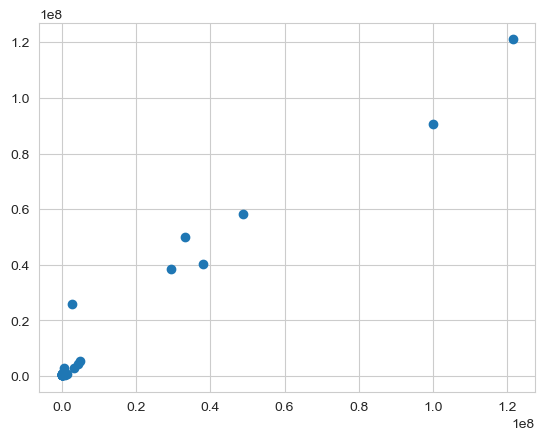

In [75]:
#plot log_SCOPE_1 vs log_predictions
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(x = 'SCOPE_1', y = 'predictions', data = df_test)
plt.xlabel('SCOPE_1')
plt.ylabel('predictions')
plt.show()

In [ ]:
#pickle randomforest model
import pickle
#pickle.dump(search, open('randomfmodel.pkl','wb'))

In [ ]:
# Predict on the training data
df_train['S1_log_randomf'] = search.predict(X_train)

# Predict on the test data
df_test['S1_log_randomf'] = search.predict(X_test)

# Concatenate df_train and df_test to get df_main
df_main = pd.concat([df_train, df_test])

In [ ]:
df_test['forestprediction'] = df_test['S1_log_randomf'].apply(lambda x: np.exp(x))

In [ ]:
mean_squared_error(df_test['forestprediction'], df_test['SCOPE_1'])

18.90704068076729

In [ ]:
df_test[['forestprediction', 'SCOPE_1']]

,forestprediction,SCOPE_1
289,2.333636,0.769000
9,0.042253,0.042011
57,0.641159,0.581703
60,47.683530,33.200000
25,0.050193,0.045400
63,53.859906,48.800000
92,0.204055,0.177347
184,0.027939,0.003774
244,0.028119,0.001530
46,0.067348,0.059451


In [23]:
#plot forestprediction vs SCOPE_1
import matplotlib.pyplot as plt
plt.scatter(df_test['forestprediction'], df_test['SCOPE_1'])
plt.xlabel('forestprediction')
plt.ylabel('SCOPE_1')
plt.show()

KeyError: 'forestprediction'

# KNN MODEL

In [ ]:
y_test

287    5.904000
288    8.191000
305    0.165138
286    5.701000
303    0.162620
306    0.164075
284    3.868000
304    0.155682
308    0.050600
309    0.048700
289    0.769000
307    0.061900
285    4.935000
Name: SCOPE_1, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline


# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])

# Create a KNN Regressor instance
knn = KNeighborsRegressor()

# Make a pipeline combining the preprocessor and the KNN model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', knn)])

# Define the hyperparameter grid
param_grid = {
    'regressor__n_neighbors':
     range(1, 11),
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Predict on the test data
y_pred = grid_search.predict(X_test)

# Evaluate the model
print("Test set mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Test set R2 score: %.2f' % r2_score(y_test, y_pred))


/Users/elizavetabugaeva/anaconda3/envs/spiced_final/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/elizavetabugaeva/anaconda3/envs/spiced_final/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/elizavetabugaeva/anaconda3/envs/spiced_final/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/elizavetabugaeva/anaconda3/envs/spiced_final/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/elizavetabugaeva/anaconda3/envs/spiced_final/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimato

Best parameters: {'regressor__n_neighbors': 1}
Best score: nan


/Users/elizavetabugaeva/anaconda3/envs/spiced_final/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/elizavetabugaeva/anaconda3/envs/spiced_final/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/elizavetabugaeva/anaconda3/envs/spiced_final/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/elizavetabugaeva/anaconda3/envs/spiced_final/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/elizavetabugaeva/anaconda3/envs/spiced_final/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimato

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
#pickle knn model
#pickle.dump(grid_search, open('knnmodel.pkl','wb'))

# XGBoost

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])

# Create an XGBoost Regressor instance
xgb = XGBRegressor(random_state=0)

# Make a pipeline combining the preprocessor and the XGBoost Regressor
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', xgb)])

# Define the hyperparameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__max_depth': [3, 5, 7],
    'regressor__colsample_bytree': [0.7, 0.8, 1],
    'regressor__gamma': [0, 0.1, 0.2]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Predict on the test data
y_pred_xgboost = grid_search.predict(X_test)

# Evaluate the model
print("Test set mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Test set R2 score: %.2f' % r2_score(y_test, y_pred))

Best parameters: {'regressor__colsample_bytree': 0.7, 'regressor__gamma': 0, 'regressor__learning_rate': 0.05, 'regressor__max_depth': 7, 'regressor__n_estimators': 300}
Best score: -0.4935779020297891
Test set mean squared error: 0.78
Test set R2 score: 0.90


In [ ]:
#pickle xgboost model
pickle.dump(grid_search, open('xgboost.pkl','wb'))

## Add the XGboost predictions to the dataframe

In [ ]:
# Predict on the training data
df_train['S1_log_xgboost'] = grid_search.predict(X_train)

# Predict on the test data
df_test['S1_log_xgboost'] = grid_search.predict(X_test)

# Concatenate df_train and df_test to get df_main
df_main = pd.concat([df_train, df_test])

In [ ]:
#Save the new columns in dataframe to csv
df_main.to_csv('with_imp.csv', index=False)

In [ ]:
# Predict on the training data
df_train['S1_xgboost'] = np.exp(df_train['S1_log_xgboost'])
# Predict on the test data
df_test['S1_xgboost'] = np.exp(df_test['S1_log_xgboost'])

# Concatenate df_train and df_test to get df_main
df_main = pd.concat([df_train, df_test])

In [ ]:
#Save the new columns in dataframe to csv
df_main.to_csv('with_imp.csv', index=True)

# Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])

# Create a Linear Regression instance
lr = LinearRegression()

# Make a pipeline combining the preprocessor and the Linear Regressor
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', lr)])

# Train the regressor
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear = pipeline.predict(X_test)

# Evaluate the model
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('R2 score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.78
R2 score: 0.90


In [ ]:
# Add linear regression predictions as a new column to df_main

# Predict on the training data
df_train['S1_log_linear'] = pipeline.predict(X_train)

# Predict on the test data
df_test['S1_log_linear'] = pipeline.predict(X_test)

# Concatenate df_train and df_test to get df_main
df_main = pd.concat([df_train, df_test])

In [ ]:
# Import the ElasticNet model
from sklearn.linear_model import ElasticNet

# Create an ElasticNet instance
elastic_net = ElasticNet()

# Make a pipeline combining the preprocessor and the ElasticNet model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', elastic_net)])

# Define the hyperparameter grid
param_grid = {
    'regressor__alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
    'regressor__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Instantiate GridSearchCV
elastic_grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV
elastic_grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {elastic_grid_search.best_params_}")
print(f"Best score: {elastic_grid_search.best_score_}")

# Predict on the test data
y_pred = elastic_grid_search.predict(X_test)

# Evaluate the model
print("Test set mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Test set R2 score: %.2f' % r2_score(y_test, y_pred))


Best parameters: {'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.9}
Best score: -2.354081978584936
Test set mean squared error: 2.47
Test set R2 score: 0.70


In [ ]:
y_pred

array([14.65351947, 10.6472526 , 13.39724856, 17.65992465, 10.87971095,
       17.80203442, 12.26418018, 10.23998217, 10.26065533, 11.12154223,
       10.00786396, 11.84352905, 12.74469949, 11.05687381, 14.92241485,
       13.42342655, 12.25719631, 11.38434752, 11.47737983, 14.64910516,
        9.78756079, 12.56599247, 13.71800305, 17.47157575, 10.14022764,
       18.52489643, 18.35839031, 13.64998997, 15.20223112, 17.52023283,
       16.39383145])

In [ ]:
y_test

289    13.552846
9      10.645687
57     13.273715
60     17.318060
25     10.723267
63     17.703241
92     12.085864
184     8.235891
244     7.333023
46     10.992908
75     11.654792
163    11.679287
296    13.246328
307    11.033275
285    15.411863
290    13.699876
5      12.815713
155    11.472416
164    11.725647
168    15.009433
73      9.829675
104    12.530787
137    14.214287
206    17.195144
76     11.395336
173    18.614519
113    18.420681
33     13.835313
275    15.297115
251    17.453097
108    14.830016
Name: log_SCOPE_1, dtype: float64

In [ ]:
#load pickled models
import pickle
randomf = pickle.load(open('randomfmodel.pkl','rb'))

In [ ]:
xgboost = pickle.load(open('model.pkl','rb'))
knn = pickle.load(open('knnmodel.pkl','rb'))

# Ensemple models using voting regressor


In [ ]:
from sklearn.ensemble import VotingRegressor
voting = VotingRegressor(estimators=[('randomf', randomf), ('knn', knn)])

In [ ]:
# Fit the voting regressor
voting.fit(X_train, y_train)

VotingRegressor(estimators=[('randomf',
                             GridSearchCV(cv=5,
                                          estimator=Pipeline(steps=[('preprocessor',
                                                                     ColumnTransformer(transformers=[('num',
                                                                                                      StandardScaler(),
                                                                                                      Index(['NUMBER_OF_EMPLOYEES', 'ENERGY_CONSUMPTION_TOTAL',
       'TOTAL_WASTE_GENERATED', 'Income', 'Market Cap', 'Revenue',
       'Total Assets', 'TTM Gross Profit', 'Gross Margin', 'Waste GHG',
       'GHG per Capita', 'Country GHG_y...
       'Total Assets', 'TTM Gross Profit', 'Gross Margin', 'Waste GHG',
       'GHG per Capita', 'Country GHG_y', 'Energy GHG', 'Year_new'],
      dtype='object')),
                                                                                                     ('cat',
                                                                                                      OneHotEncoder(handle_unknown='ignore'),
                                                                                                      Index(['Income group', 'ISIC Division'], dtype='object'))])),
                                                                    ('regressor',
                                                                     KNeighborsRegressor())]),
                                          param_grid={'regressor__n_neighbors': range(1, 11)},
                                          scoring='neg_mean_squared_error'))])

In [ ]:
#score the voting regressor
voting.score(X_test, y_test)

0.9390277928127626

In [ ]:
#save voting model
import pickle
pickle.dump(voting, open('votingmodel.pkl','wb'))

In [ ]:
#save predicted values in dataframe
df_train['S1_log_voting'] = voting.predict(X_train)
df_test['S1_log_voting'] = voting.predict(X_test)

# Concatenate df_train and df_test to get df_main
df_main = pd.concat([df_train, df_test])

In [ ]:
#Use stacking to combine the models
from sklearn.ensemble import StackingRegressor
stacking = StackingRegressor(estimators=[('randomf', randomf), ('knn', knn)])

In [ ]:
# Fit the stacking regressor
stacking.fit(X_train, y_train)

StackingRegressor(estimators=[('randomf',
                               GridSearchCV(cv=5,
                                            estimator=Pipeline(steps=[('preprocessor',
                                                                       ColumnTransformer(transformers=[('num',
                                                                                                        StandardScaler(),
                                                                                                        Index(['NUMBER_OF_EMPLOYEES', 'ENERGY_CONSUMPTION_TOTAL',
       'TOTAL_WASTE_GENERATED', 'Income', 'Market Cap', 'Revenue',
       'Total Assets', 'TTM Gross Profit', 'Gross Margin', 'Waste GHG',
       'GHG per Capita', 'Country GHG...
       'Total Assets', 'TTM Gross Profit', 'Gross Margin', 'Waste GHG',
       'GHG per Capita', 'Country GHG_y', 'Energy GHG', 'Year_new'],
      dtype='object')),
                                                                                                       ('cat',
                                                                                                        OneHotEncoder(handle_unknown='ignore'),
                                                                                                        Index(['Income group', 'ISIC Division'], dtype='object'))])),
                                                                      ('regressor',
                                                                       KNeighborsRegressor())]),
                                            param_grid={'regressor__n_neighbors': range(1, 11)},
                                            scoring='neg_mean_squared_error'))])

In [ ]:
stacking.score(X_test, y_test)

0.9367842513708409

In [51]:
import pickle

In [52]:
voting = pickle.load(open('votingmodel.pkl','rb'))

In [53]:
test_pred = voting.predict(X_test)

AttributeError: 'NoneType' object has no attribute 'split'